In [1]:
import os
from tqdm.notebook import tqdm as tqdm
from PIL import ImageFont, ImageDraw, Image
from IPython.display import display
from IPython.display import Image as im
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
from scipy.ndimage.filters import gaussian_filter
import random, string
import cv2
%matplotlib inline

In [5]:
# Initialization by defining constants

imageType='.jpg'
folderName='Texture_train'
if 'test' in folderName:
    numberOfImages=8041
elif 'train' in folderName:
    numberOfImages=8144
else:
    numberOfImages=1 

height = 128
width = 128
textFill=255
fontsize = 135  # starting font size # font size doesn't matter

textVertical = 0
textHorizontal = 0

decayConstant=50
decayTime=0.01



imageType='.jpg'
folderName='Texture_test'
cwd = os.getcwd()
print(cwd)
saveDirectory=cwd+"\\"+folderName+'\\'

for i in range(numberOfImages):
    
    namePrefix='{:05}'.format(i)
    
    # Creating an empty image
    randomImage = np.zeros((height,width),dtype=np.uint8)
    randomImage=Image.fromarray(randomImage)
    draw = ImageDraw.Draw(randomImage)

    # Choosing an ascii uppercase letter
    textInImage = random.choice(string.ascii_uppercase)

                                                    font = ImageFont.truetype("arial.ttf", fontsize)
    draw.text((textHorizontal, textVertical), textInImage, font=font, fill=(textFill)) # put the text on the image

    imageName=namePrefix
    imageNameRaw=saveDirectory+imageName+imageType
    randomImageAsArray = np.asarray(randomImage)
    
    if 'test' in folderName:
        randomSeed=12
    elif 'train' in folderName:
        randomSeed=42
    else:
        randomSeed=32
    randomGenerator = np.random.default_rng(seed=randomSeed)
      
    # Deifning the text texture
    arrayList=[]
    letterMask=randomImageAsArray>=50

    
    for i in range(3):
        noiseAsArray_ = randomGenerator.random((randomImage.size[1],randomImage.size[0]))*255
        randomImageAsArrayCopy=randomImageAsArray.copy()
        randomImageAsArrayCopy_=randomImageAsArray.copy()
        randomImageAsArrayCopy[noiseAsArray_ <= 100]=noiseAsArray_[noiseAsArray_ <= 100]
        randomImageAsArrayCopy = np.asarray(gaussian_filter(randomImageAsArrayCopy, sigma=7))
        randomImageAsArrayCopy_[letterMask]=randomImageAsArrayCopy[letterMask]
        arrayList.append(randomImageAsArrayCopy_)

    imageNameTexture=saveDirectory+imageName+imageType    
    np_array=np.stack(arrayList, axis=2)
    cv2.imwrite(imageNameTexture, np_array)

C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel


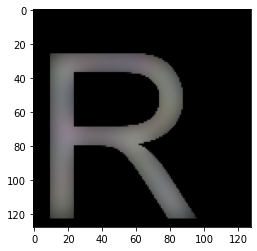

In [6]:
plt.imshow(np_array[:,:,:])
plt.show()

In [7]:
print(np.sum(arrayList[0]!=arrayList[1]))

3399
